In [43]:
using Plots

const size=20

#Generate random angles from 0 to 2Pi

anglevec=rand(Float64, size)
mystifier(x)=if x>0.5 return 3π/2+(x-0.5)*π else return π*x end
@.(anglevec=mystifier(anglevec))

#Map to the complex circle

compvec=cis.(anglevec)

#Lazily compute normal means (which are then mapped to the complex unit circle) and circlemeans for each timestep

norm_means=(cis(sum(@views anglevec[1:i])/i) for i in eachindex(anglevec))

circ_means=(sum(@views compvec[1:i])/abs(sum(@views compvec[1:i])) for i in eachindex(anglevec))


Base.Generator{Base.OneTo{Int64}, var"#27#28"}(var"#27#28"(), Base.OneTo(20))

Plots.AnimatedGif("/Users/jerobinett/Desktop/JuliaPractice/Circular_Mean/test.gif")
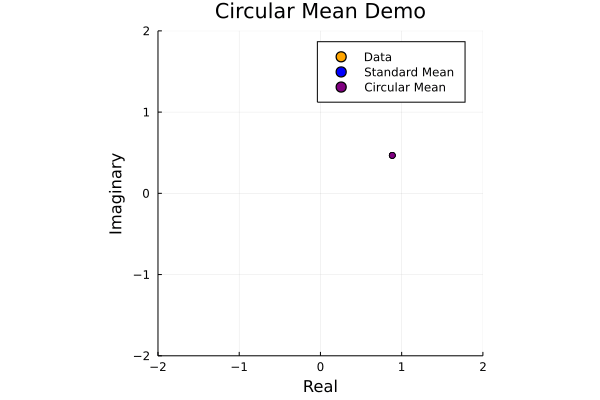

┌ Info: Saved animation to 
│   fn = /Users/jerobinett/Desktop/JuliaPractice/Circular_Mean/test.gif
└ @ Plots /Users/jerobinett/.julia/packages/Plots/lzHOt/src/animation.jl:104


In [46]:
anim = @animate for (standard, circ, idx) in zip(norm_means,circ_means,1:size)
    baseplot=plot(;seriestype=:scatter,title="Circular Mean Demo", xlabel="Real", ylabel="Imaginary",xlims=(-2,2),ylims=(-2,2),aspect_ratio=:equal)
    plot!(baseplot, real.(compvec[1:idx]),imag.(compvec[1:idx]);seriestype=:scatter,color="orange",label="Data")
    plot!(baseplot, [real(standard)],[imag(standard)];seriestype=:scatter,color="blue",label="Standard Mean")
    plot!(baseplot, [real(circ)],[imag(circ)];seriestype=:scatter,color="purple",label="Circular Mean")
end

display(gif(anim,"test.gif",fps=2))